In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df['Exited'].value_counts()

In [ ]:
df['Geography'].value_counts()

In [ ]:
df['Gender'].value_counts()

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

In [ ]:

X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

In [62]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.5453 - val_accuracy: 0.7969 - val_loss: 0.4988
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7912 - loss: 0.5079 - val_accuracy: 0.7969 - val_loss: 0.4966
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8024 - loss: 0.4930 - val_accuracy: 0.7969 - val_loss: 0.4962
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7944 - loss: 0.5004 - val_accuracy: 0.7969 - val_loss: 0.4959
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4936 - val_accuracy: 0.7969 - val_loss: 0.4957
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4918 - val_accuracy: 0.7969 - val_loss: 0.4956
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8006 - loss: 0.4924 - val_accuracy: 0.7969 - val_loss: 0.4952
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.5064 - val_ac

In [66]:
model.layers[1].get_weights()

[array([[-0.0552239 , -0.48157516, -0.19202115,  0.45704743, -0.55772215,
          0.38132307,  0.0541893 , -0.31939873, -0.5331473 ,  0.43418866,
          0.24356894],
        [ 0.09638411, -0.23106228, -0.19085439, -0.50505406,  0.21321219,
          0.09936739,  0.02905905, -0.05301609, -0.40579468, -0.0275612 ,
          0.08243147],
        [-0.01448748,  0.02982886, -0.54402363, -0.21093814,  0.00360259,
         -0.12264539, -0.19087054,  0.51351666, -0.56255   ,  0.23671389,
          0.5730881 ],
        [ 0.31185436,  0.16322006, -0.03104025,  0.5683781 , -0.51430863,
          0.02304415, -0.4151816 ,  0.15899289, -0.06094036, -0.24499246,
         -0.2109625 ],
        [-0.4596823 , -0.17666167,  0.2911612 , -0.21061252, -0.46666726,
         -0.1552373 ,  0.16867821, -0.23194912,  0.08447794,  0.00575442,
          0.19410701],
        [ 0.53429466,  0.350687  , -0.48919997, -0.53081685, -0.29639164,
          0.4537036 , -0.7244441 , -0.2860576 , -0.0232649 ,  0.1510288

In [57]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [67]:
y_pred=np.where(y_log>0.5,1,0)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.714

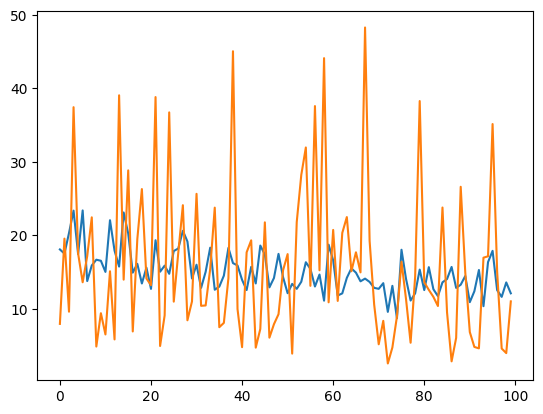

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

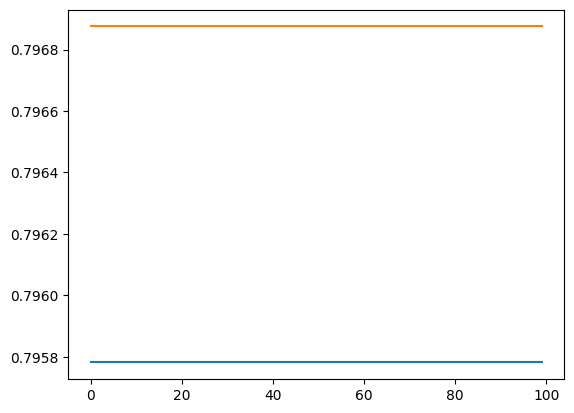

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])